# From Web to Plot
pythonプログラムの実例の一つとして、
Internetで入手可能なデータを取り込んで、グラフ化してみます。
東洋経済オンラインがwebで公開している、Covid19の時系列データを
取り込み、グラフ化してみます。

## web上のデータをダウンロード
まずはweb上で公開されているcsvデータをローカルファイルにダウンロードしてみます。python3では`urllib`モジュールの`request`サブモジュールを使って、指定したURLの内容をプログラムを使って読み込むことができます。
このモジュールをプログラムで利用するために、このモジュールをインポート（`import`)します。

pythonには豊富な標準ライブラリモジュールが用意されています。また、第三者によって提供されているモジュールも豊富です。Pythonでのプログラム開発では、これらのモジュールをうまく使いこなすことがコツの一つです。文献／web pageを利用して必要なモジュールを探してみましょう。

In [1]:
import urllib.request

ここでは、`urllib.request` モジュールの中の `urlopen()`関数だけが必要です。　この様な場合には、`urlopen`関数だけを選択的にインポートすることができます。

In [2]:
from urllib.request import urlopen

次にデータをダウンロードするURLのリストを作っておきます。このリストに`dataurls`という名前をつけておきます。

In [3]:
dataurls=(
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/pcr_positive_daily.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/pcr_tested_daily.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/cases_total.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/recovery_total.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/death_total.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/pcr_case_daily.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/severe_daily.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/effective_reproduction_number.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/demography.csv",
        "https://toyokeizai.net/sp/visual/tko/covid19/csv/prefectures.csv"
    )

python3にはデータ(オブジェクト）の並びを表現するためにふたつのデータ形, リスト( [,] )とタプル( (,) ) が用意されています。リストはデータを作成した後で、要素を変更(取り替え）することができますが、タプルはその要素を変更(取り替え）することができません。URLのリストはプログラム中で変更する必要はありませんから、`dataurls`はURLのタプルとして定義しました。

次に、URLで指定されるcsvファイル(csv:comma separated value,カンマ区切り形式）をローカルファイルにダウンドードする関数　`load()`　を定義します。

In [4]:
def load(dataurl):
    fn=dataurl.split("/")[-1]
    with urlopen(dataurl) as inf , open(fn,"wb") as outf:
        print ("downloading :", fn)
        data=inf.read()
        outf.write(data)

`def`キーワードを使って、関数`load（）`を定義しています。`load`の引数は`dataurl`です。
関数の本体は、`:`に続く文で定義します。関数本体のプログラム文は`def`キーワードに対してインデントされています。同様に`with`文の本体(`:`のあとの文）も`with`に対してインデントされていることに気をつけてください。インデントにTABを使うこともできますが、1byte文字の空白`' '`を使うことを推奨します。
このpythonでのブロック構造の表現はちょっと特殊ですが、出来上がったプログラムが読みやすくなることを狙って採用されています。

この関数`load()` は `dataurl` の最後の要素であるファイル名と同じ名前のローカルファイルにデータを保存します。 `dataurl` の文字列は `"/"` を区切りとして切り分けられます`dataurl.split("/")` 。
切り分けたリストの最後の要素`[-1]` がファイル名 `xxxx.csv` です。

`urlopen()`で確立したwebとの接続を `inf`, 書き込み用(`w`)にオープンしたバイナリ形式データ(`b`)のファイル指示子を`outf`として使うことを`with ... as ...,:`構文で宣言しています。

この構文(context manager)を使うことで、確実にこれらのフィアル／接続がこのセクション実行後に自動的に`close`されることが保証されます。

あとはデータを読み込んで、`data=inf.read()`, それをファイルに書き出す、`outf.write(data)`、だけです。

dataurlsの各要素についてこの関数を呼び出します。

In [5]:
import os, certifi
os.environ["SSL_CERT_FILE"]=certifi.where()

for dataurl in dataurls:
    load(dataurl)

downloading : pcr_positive_daily.csv
downloading : pcr_tested_daily.csv
downloading : cases_total.csv
downloading : recovery_total.csv
downloading : death_total.csv
downloading : pcr_case_daily.csv
downloading : severe_daily.csv
downloading : effective_reproduction_number.csv
downloading : demography.csv
downloading : prefectures.csv


## CSVから SQL Dtabaseへの変換
データの検索などの操作はCVSデータをSQL Database（ここではsqlite3データベースを利用）に変換することで、簡単に行えるようになります。 この変換は色々な手法がありますが、今回試してみた結果pandasのdataframeを経由する方法が簡単確実です。

pandasは最近話題のanacond/minicondaなどでも使われているpythonでのデータ処理向けのライブラリです。 dataframeと呼ばれるデータ構造を提供しており、 単純なアレイ構造を超えた取扱を実現しています。ただ、使いこなしにはある程度の練習が必要な様です。ここでは`dataframe` の備えるcvs/sqlへの読み書きの機能だけを使います。

まず`dataframe`形のデータを使える様に、`pandas`モジュールをインポートしましょう。`sqlite3`, `os` もインポートしておきます。
`os.path`モジュールからは`splitext`関数だけをインポートしておきます。

In [6]:
import pandas
import sqlite3
from os.path import splitext
import os

次に一つのdataurlについて、先ほどダウンロードした csvファイルを読み込み、sqlデータベースのテーブルとして追加する関数`from_cvs_to_sql()` 関数を定義します。

In [7]:
def from_csv_to_df(dataurl):
    fn=dataurl.split("/")[-1]
    df=pandas.read_csv(fn)
    return df

def from_csv_to_sql(dataurl):
    fn=dataurl.split("/")[-1]
    df=from_csv_to_df(fn)
    with sqlite3.connect('covid19.db') as con:
        print ("convert ",splitext(fn)[0])
        df.to_sql(splitext(fn)[0],con)
    os.remove(fn)

In [8]:
import os, certifi
os.environ["SSL_CERT_FILE"]=certifi.where()

try:
    os.remove('covid19.db')
except FileNotFoundError:
    pass
for dataurl in dataurls:
    from_csv_to_sql(dataurl)

convert  pcr_positive_daily
convert  pcr_tested_daily


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


convert  cases_total
convert  recovery_total
convert  death_total
convert  pcr_case_daily
convert  severe_daily
convert  effective_reproduction_number
convert  demography
convert  prefectures


## sql databaseの確認
作成されたデータベースのschemaをチェックしてみましょう。
sqlite3ではデータベースに含まれるテーブルなどのschme情報は、 `sqlite_master`テーブルに存在します。この中の`SQL`欄をみることで、それぞれのテーブルが持つカラムとそのデータ型を知ることもできますが、sqlite3では`PRAGMA`機能を使って、それらの情報を取り出すこともできます。


In [9]:
def dump_table_info(dbf):
    db=sqlite3.connect(dbf)
    cur=db.cursor()
    table_info =cur.execute("select name,sql from sqlite_master where type = 'table'").fetchall()
    for tbl,sql in table_info:
        print ("******* table: {:s} *******".format(tbl))
        print ("sql:",sql)
        print ("------ field info -----")
        cur.execute("PRAGMA table_info({:s});".format(tbl))
        print ("rowid","name","type","nullable","defalut", "pk(primary key)")
        for e in cur.fetchall():
            print (*e)
            
    print("****** data count in tables ******")
    print( "table\tcout")
    for tbl,sql in table_info:
        cur.execute("select count(*) from %s;"%tbl)
        print (tbl,"\t", cur.fetchone()[0])

dump_table_info("covid19.db")

******* table: pcr_positive_daily *******
sql: CREATE TABLE "pcr_positive_daily" (
"index" INTEGER,
  "日付" TEXT,
  "PCR 検査陽性者数(単日)" INTEGER,
  "Unnamed: 2" REAL,
  "Unnamed: 3" TEXT
)
------ field info -----
rowid name type nullable defalut pk(primary key)
0 index INTEGER 0 None 0
1 日付 TEXT 0 None 0
2 PCR 検査陽性者数(単日) INTEGER 0 None 0
3 Unnamed: 2 REAL 0 None 0
4 Unnamed: 3 TEXT 0 None 0
******* table: pcr_tested_daily *******
sql: CREATE TABLE "pcr_tested_daily" (
"index" INTEGER,
  "日付" TEXT,
  "PCR 検査実施件数(単日)" INTEGER
)
------ field info -----
rowid name type nullable defalut pk(primary key)
0 index INTEGER 0 None 0
1 日付 TEXT 0 None 0
2 PCR 検査実施件数(単日) INTEGER 0 None 0
******* table: cases_total *******
sql: CREATE TABLE "cases_total" (
"index" INTEGER,
  "日付" TEXT,
  "入院治療を要する者" INTEGER
)
------ field info -----
rowid name type nullable defalut pk(primary key)
0 index INTEGER 0 None 0
1 日付 TEXT 0 None 0
2 入院治療を要する者 INTEGER 0 None 0
******* table: recovery_total *******
sql: CREATE TAB

この様に、csvに含まれるデータから、SQL テーブルの各コラムのデータ型も適切に選択されていることがわかります。

## データのプロット
作成されたデータベースから、茨城県の2021年の日毎の陽性者数の推移をグラフにしてみます。グラフのプロットには`matplotlib`モジュールの`pyplot`サブモジュールを使います。
また、日付データを適切に取り扱うために`datetime`モジュールも使います。

In [10]:
#%matplotlib inline #なくても良いようです。
import matplotlib.pyplot as pyplot
import datetime

In [11]:
def plot_positive(pref):
    with sqlite3.connect("covid19.db") as db:
        cur=db.cursor()
        data=cur.execute(
            """
            select year, month, date, testedPositive, peopleTested
            from  prefectures 
            where  prefectureNameJ == \"{}\" 
            and    (year,month) >= (2020,10)
            order by year,month,date;
            """.format(pref)
        ).fetchall()
        xdata=[datetime.date(y,m,d) for y,m,d,*v in data]
        ydata=[v for y,m,d,*v in data]
        pyplot.xlabel("date")
        pyplot.ylabel("Positive")
        pyplot.plot(xdata,[v[0] for v in ydata])
        pyplot.draw()
        locs,labels=pyplot.xticks()
        pyplot.xticks(locs[::2], labels[::2],font="Hiragino Mincho ProN")

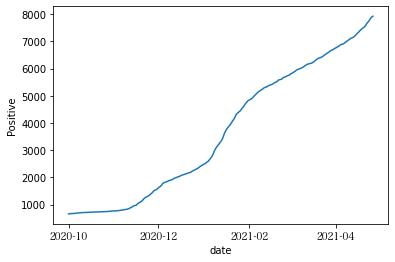

In [12]:
plot_positive("茨城県")

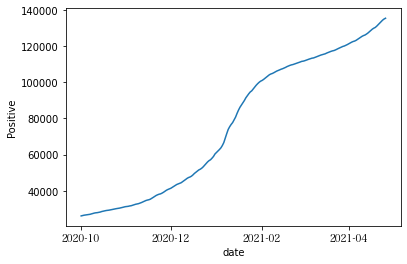

In [13]:
pyplot.clf()
plot_positive("東京都")
#pyplot.show()

## Dataframe を使って、同様のことができるか確認してみる。

Dataframeを使って同様のグラフを書かせてみた。 loc（）メソッドを使うと、SQLのselect相当のことが可能。
StringIOを使うことで、中間のcsvファイルを生成せずにDataFrameに変換ができる。

In [14]:
import io
from io import StringIO, BytesIO

def load_csv_to_df(dataurl):
    fn=dataurl.split("/")[-1]
    with urlopen(dataurl) as inf:
        print ("downloading :", fn)
        data=inf.read().decode('utf-8') # binary dataをUnicodeに変換
        sio=io.StringIO(data) # dataをStringIOにセット。
    df=pandas.read_csv(sio) #
    return df

def plot_positive_df(pref):
    #load(dataurls[-1]) #csv を読んで
    #df=load_csv_to_df(dataurls[-1]) # pandas dataframe に変換
    df= pandas.read_csv(urlopen(dataurls[-1]))
    # .loc()メソッドを使って、データを選択。
    # df=df.loc[(df.prefectureNameJ == "{}".format(pref)) & 
    #           ((df.year > 2020) | ((df.year == 2020) & (df.month >= 10))) , :]
    df=df.loc[df.apply(
                 lambda x:
                    (x.prefectureNameJ == "{}".format(pref))
                    and ((x.year,x.month) > (2020,10)), axis=1) , :]
    #df=df[df.prefectureNameJ == "{}".format(pref)][(df.year > 2020)]
    # "datetime" column を追加。
    df['datetime']=df.apply(lambda x:datetime.date(x.year, x.month,x.date), axis=1)
    # line plotでプロットしてみる。
    df.plot.line(x="datetime",y="testedPositive")   

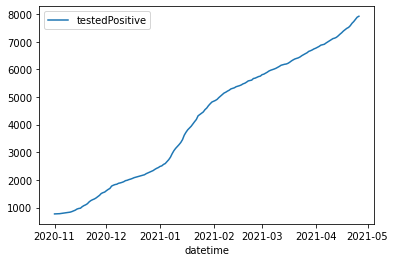

In [15]:
plot_positive_df("茨城県")

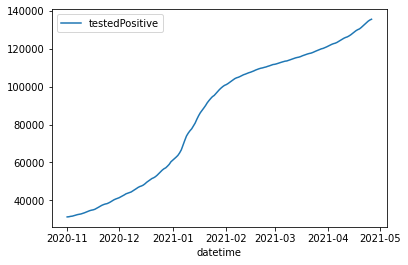

In [16]:
plot_positive_df("東京都")